In [4]:
import scipy.io
import os
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import tukey 
import numpy as np
import vectorised_hf as vhf

# Load just the waveform from the data file
data = scipy.io.loadmat('data/ultrasound_reflection_data.mat', variable_names=['__header__', '__version__', '__globals__', 'elementPositions', 'samplingFrequency', 'soundSpeed','waveform', 'rcvData'])
waveform = data['waveform']
print(type(data))
print (data.keys())
folder_path = 'data'


<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'elementPositions', 'rcvData', 'samplingFrequency', 'soundSpeed', 'waveform'])


In [5]:
# Extract the numpy arrays from the dictionary using their variable names
waveform = data['waveform']
samplingFrequency = data['samplingFrequency']
elementPositions = data['elementPositions']
soundSpeed = data['soundSpeed']
rcvData = data['rcvData']


In [6]:
Ntx, Nrx, Nt = rcvData.shape
rcvData2D = rcvData.reshape(Ntx*Nrx, Nt)
winData2D = vhf.tukey_vectorised(rcvData2D,  alpha=0.1, noise_Length=300)
test_env = vhf.envelope_detection(winData2D)

(2560,)
()
256.0
()
256.0
167772160


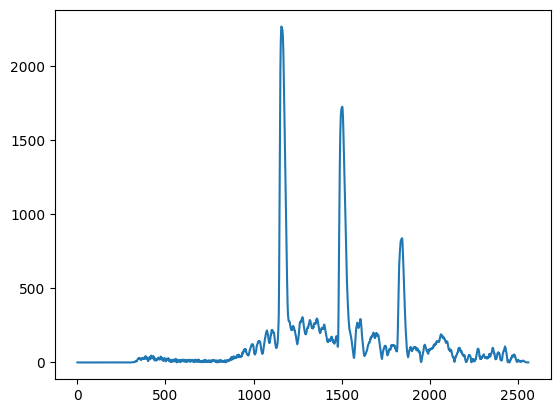

In [7]:
plt.plot (test_env[1,:])

In [8]:
# Test the create Imaging Grid function with dx = 0.0003 and Lx = 0.24
dx = 0.002 
Lx = 0.24
X, Y = vhf.createImagingGrid(dx, Lx)
Npx = X.size
print(Npx)

14400


In [9]:
# Precompute the distance map here [m]
# Define parameters
dx = 0.001  # Grid spacing
Lx = 0.1    # Size of the grid
speedOfSound = 1540  # Speed of sound in m/s (typical for soft tissues)

# Create imaging grid
Xp, Yp = vhf.createImagingGrid(dx, Lx)

# Detector coordinates (example values)
Xd = np.array([0.05, 0.07])  # X coordinates of detectors
Yd = np.array([0.05, 0.07])  # Y coordinates of detectors

# Calculate distance map
distanceMap = vhf.calculateDistanceMap(Xd, Yd, Xp, Yp)

# Convert distance map to time map
timeMap = vhf.timeMap(distanceMap, speedOfSound)

# Now timeMap contains the time taken for sound to travel 
# from each detector position to each pixel position

# Precompute the distance map here [m]

# Convert this to a delay map [s]

# Convert this to a sample index travel time map [samples]

AttributeError: module 'vectorised_hf' has no attribute 'calculateDistanceMap'

In [ ]:
# Initialise accumulator
accumulator = 0

In [ ]:
accumulated_values = np.zeros(X.shape)

In [ ]:
total_pixels = X.shape[0] * X.shape[1]
current_pixel = 0

for pixel_row in range(X.shape[0]):
    for pixel_col in range(X.shape[1]):
        accumulator = 0
        Xp = X[pixel_row, pixel_col]
        Yp = Y[pixel_row, pixel_col]
        # Loop over all transmitters and receivers
        for Tx in [0]: 
            for Rx in range(256):  
                x = vhf.accumulate_signal(Tx, Rx, Xp, Yp, elementPositions, soundSpeed, samplingFrequency, rcvData) # Not sure how to include processed data, 
                                                                             # since the 3d matrix is embedded back into the accumulate function, instead of the pre processed vectorisation function
        accumulated_values[pixel_row, pixel_col] = accumulator
        # Update progress
        current_pixel += 1
        percentage_completed = (current_pixel / total_pixels) * 100
        print(f"{percentage_completed:.2f}%", end='\r') # prints to 2dp, with a return

In [ ]:
# Plot X and Y using plt.imshow
plt.imshow(accumulated_values)